In [2]:
import planetary_computer
import pystac_client
import stackstac
import matplotlib.pyplot as plt

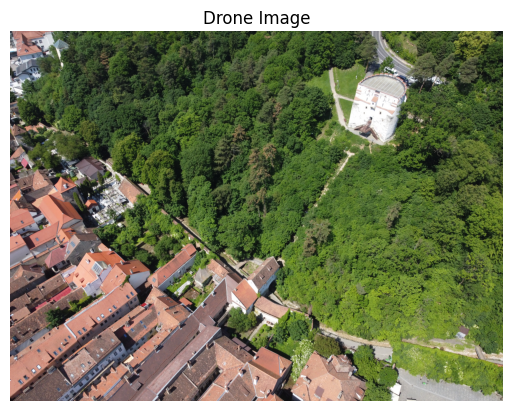

In [2]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread("DJI_0073.JPG")

# OpenCV carga en BGR, lo convertimos a RGB para mostrar correctamente
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar con matplotlib
plt.imshow(image_rgb)
plt.title("Drone Image")
plt.axis("off")
plt.show()



In [3]:
image.shape
print("Alto (px):", image.shape[0])
print("Ancho (px):", image.shape[1])
print("Canales:", image.shape[2])  # 3 si es RGB

print("Tamaño total de pixeles:", image.size)        # alto*ancho*canales
print("Tipo de dato:", image.dtype) 

Alto (px): 3000
Ancho (px): 4000
Canales: 3
Tamaño total de pixeles: 36000000
Tipo de dato: uint8


#This image has 36.000.000 due to: 4000 x 3000 = 12.000.000 = 12 Megapixeles y como es Uint8, it means 8 bits = 255 brightness values.

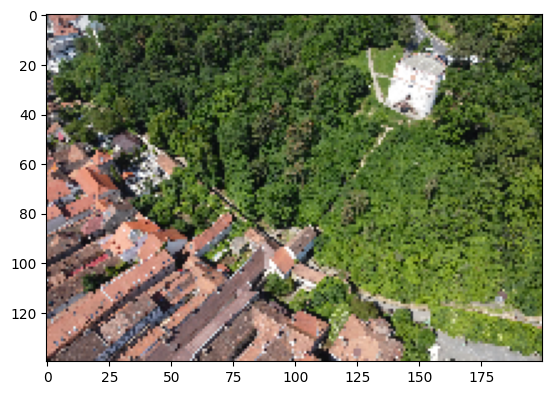

In [4]:
new_img = cv2.resize(image, (200, 140))
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)

plt.imshow(new_img)
plt.show()

In [5]:
print("Alto (px):", new_img.shape[0])
print("Ancho (px):", new_img.shape[1])
print("Canales:", new_img.shape[2])  # 3 si es RGB

print("Tamaño total de pixeles:", new_img.size)        # alto*ancho*canales
print("Tipo de dato:", new_img.dtype) 

Alto (px): 140
Ancho (px): 200
Canales: 3
Tamaño total de pixeles: 84000
Tipo de dato: uint8


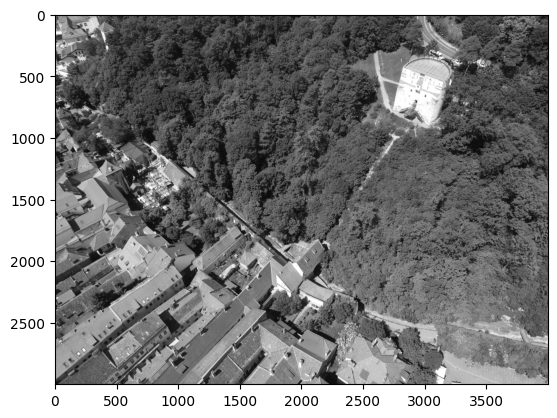

In [6]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap="gray")
plt.show()

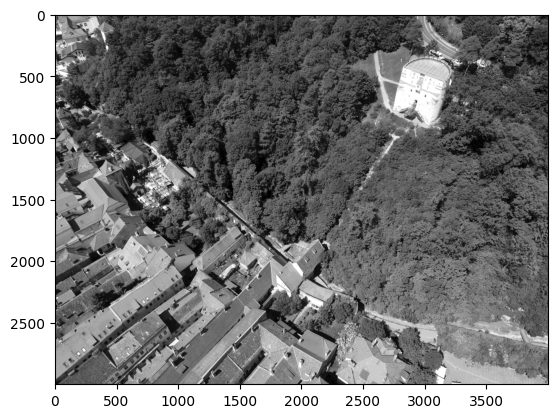

Tamaño en memoria (bytes): 12000000 en megabites: 12.0


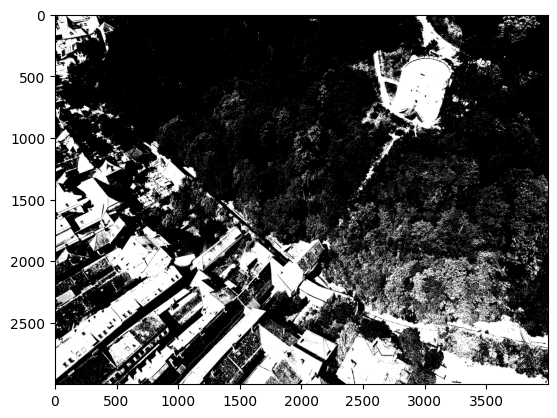

Tamaño en memoria (bytes): 12000000 en megabites: 12.0


In [8]:
#PREGUNTAR!!!

#Cambiar espectral resolution
# Reduce to 4-bit (16 levels)
img_4bit = (gray_img // 16) * 16   # quantize 256 values → 16 values

plt.imshow(img_4bit, cmap="gray")
plt.show()

# Tamaño en memoria
print("Tamaño en memoria (bytes):", img_4bit.nbytes, "en megabites:" ,img_4bit.nbytes/1000000)

# Convertir a 1-bit (2 levels)
img_1bit = (gray_img // 128) * 128  # quantize 256 values → 2 values

plt.imshow(img_1bit, cmap="gray")
plt.show()

# Tamaño en memoria
print("Tamaño en memoria (bytes):", img_1bit.nbytes, "en megabites:" ,img_1bit.nbytes/1000000)


In [16]:
gray_img//16

array([[ 4,  3,  5, ...,  3,  2,  1],
       [ 4,  3,  4, ...,  2,  2,  2],
       [ 4,  4,  4, ...,  2,  3,  3],
       ...,
       [ 1,  1,  1, ...,  9,  9,  9],
       [ 1,  1,  1, ..., 10, 10, 10],
       [ 1,  1,  1, ..., 10,  9,  9]], shape=(3000, 4000), dtype=uint8)

In [14]:
gray_img

array([[ 74,  62,  86, ...,  62,  46,  25],
       [ 72,  62,  77, ...,  41,  45,  43],
       [ 75,  69,  76, ...,  41,  48,  50],
       ...,
       [ 18,  17,  17, ..., 156, 158, 150],
       [ 20,  18,  16, ..., 166, 167, 162],
       [ 17,  19,  22, ..., 162, 159, 155]],
      shape=(3000, 4000), dtype=uint8)

In [9]:
img_4bit

array([[ 64,  48,  80, ...,  48,  32,  16],
       [ 64,  48,  64, ...,  32,  32,  32],
       [ 64,  64,  64, ...,  32,  48,  48],
       ...,
       [ 16,  16,  16, ..., 144, 144, 144],
       [ 16,  16,  16, ..., 160, 160, 160],
       [ 16,  16,  16, ..., 160, 144, 144]],
      shape=(3000, 4000), dtype=uint8)

In [10]:
img_1bit

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 128, 128, 128],
       [  0,   0,   0, ..., 128, 128, 128],
       [  0,   0,   0, ..., 128, 128, 128]],
      shape=(3000, 4000), dtype=uint8)

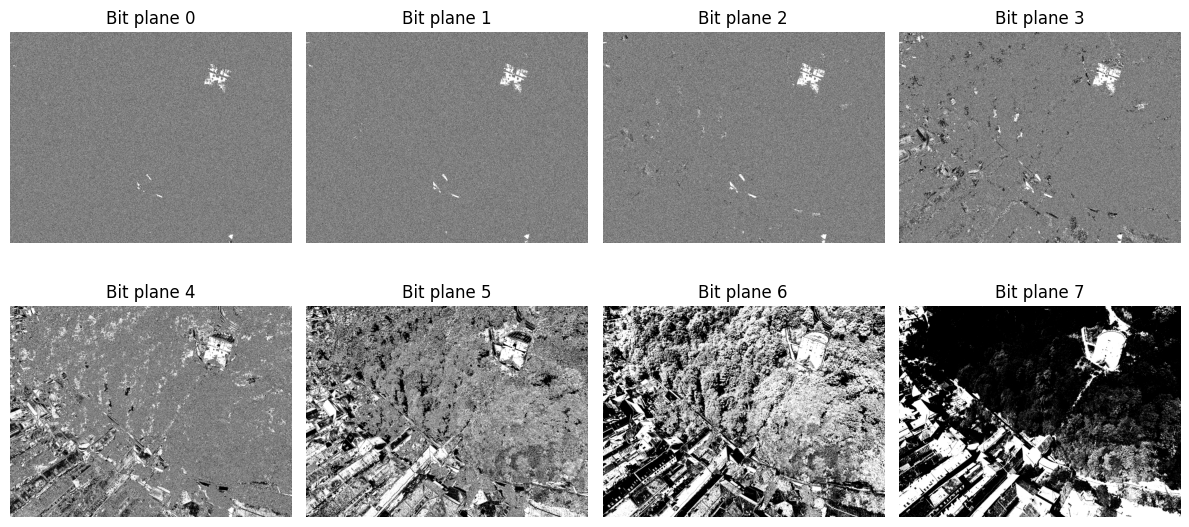

In [44]:

# Bit-plane slicing
bit_planes = []
for i in range(8):
    plane = (gray_img >> i) & 1
    plane = plane * 255  # escala a 0–255
    bit_planes.append(plane)

# Mostrar todos los bit planes
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()  # para iterar fácilmente

for i in range(8):
    axes[i].imshow(bit_planes[i], cmap='gray')
    axes[i].set_title(f'Bit plane {i}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [46]:
#hacerlo a color

b, g, r = cv2.split(image)             # separar canales

In [22]:
import numpy as np
gray_img.astype(np.uint8)

array([[ 74,  62,  86, ...,  62,  46,  25],
       [ 72,  62,  77, ...,  41,  45,  43],
       [ 75,  69,  76, ...,  41,  48,  50],
       ...,
       [ 18,  17,  17, ..., 156, 158, 150],
       [ 20,  18,  16, ..., 166, 167, 162],
       [ 17,  19,  22, ..., 162, 159, 155]],
      shape=(3000, 4000), dtype=uint8)

In [24]:

gray_img.astype(np.uint64)


array([[ 74,  62,  86, ...,  62,  46,  25],
       [ 72,  62,  77, ...,  41,  45,  43],
       [ 75,  69,  76, ...,  41,  48,  50],
       ...,
       [ 18,  17,  17, ..., 156, 158, 150],
       [ 20,  18,  16, ..., 166, 167, 162],
       [ 17,  19,  22, ..., 162, 159, 155]],
      shape=(3000, 4000), dtype=uint64)